# Project: Investigate Non-shown medical appointment Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Project Outline

Before diving into the project really quick, there are important outlines of the project needs to be considered. Following the standard steps of data analysis can not only make the steps more systematic, but also more organized overall. Thus, before starting to investigate and assess the data, listing an outline to demonstrate the thought can be really helpful to manage the overall progress of the project. This part can be modified during the data analysing process, as well, when there are important perspectives to consider or if there are important variables need further investigation.

1. Step 1: Ask questions
  1. Determine what are the relevant and irrelevant variables.
  At the first glance of the data, there are some variables that seems to be more important than others, while there are irrelevant variables to the decision making and analysis. During the assessing data process, find out those variables and ask relevant questions about the data base on the relevant variables. How to approach the data.
  2. Assuming the possible relationships between dependent and independent variables and picturing a general idea of how to plot the visualization.
2. Step 2: Wrangle data
  1. Gather 
  2. Assess data to identify any problems in data’s quality or structure
  3. Clean data by modifying, replacing, or removing data to ensure that dataset is of the highest quality and as well-structured as possible

3. Step 3: Perform EDA (Exploratory Data Analysis)
  Visualizing the data and explore them using exploratory data analysis techniques. Finding patterns, building intuitions and finding relationships among different variables.


4. Step 4: Draw conclusions (or even make predictions)
  Drawing conclusions using descriptive statistics.


5. Step 5: Communicate results

<a id='intro'></a>
## Introduction

As a BRICS country, Brazil enjoys a rapid economic development in the first decade of 20th century. However, each demographic group in Brazil enjoys different degree of economic development and it leads to many issues that need to be resolved. This investigation on the no show medical appointment in Brazil focuses on the relationship of the possibility of not showing up in a medical appointment and several demographic parameter. Base on the analysis, the audience of this report can gain more insight on what factors contribute to the possibility of non-shown medical appointment and enable the relevant organizations to make effort to reduce the overall amount of absent medical appointment thus mitigate the health risk and social risk for the society overall. 

The dataset contains the following parameters:
  1. Patient ID
  2. Appointment ID
  3. Scheduled day
  4. Appointment day
  5. Age
  6. Neighbourhood
  7. Scholarship(Whether the person is enrolled in social welfare program or not)
  8. Hypertension
  9. Diabetes
  10. Alcoholism
  11. Handicap
  12. SMS-received
  13. No-show

At the first glance, we can ask the following questions base on the parameters.
  1. Is waiting days an important factor to examine whether a patient will show up in the appointment or not?
  2. How is the enrolment of medical Bolsa Família affect the possibility of patience showing up on time for their scheduled appointment?
  3. What is the relationship between age and the probability of showing up in a medical appointment?
  4. How effective is the SMS notification program?

In [1]:
#import all the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Load the data
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


There are some typos in the column names which need to fix. At the same time, some columns can be renamed for better organization of the data.

In [4]:
#Rename the columns for better use later in the analysis
df.rename(columns = {'PatientId':'Patient_ID', 'AppointmentID': 'Appointment_ID', 'ScheduledDay':'Scheduled_Date', 'AppointmentDay': 'Appointment_Date', 'Neighbourhood':'Neibr', 'Hipertension':'Hypertension', 'Handcap':'Handicap', 'No-show':'No_show'}, inplace = True)

In [5]:
#Check to see whether the rename is properly implemented or not
df.head()

,Patient_ID,Appointment_ID,Gender,Scheduled_Date,Appointment_Date,Age,Neibr,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [6]:
#Check if there's any missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
Patient_ID          110527 non-null float64
Appointment_ID      110527 non-null int64
Gender              110527 non-null object
Scheduled_Date      110527 non-null object
Appointment_Date    110527 non-null object
Age                 110527 non-null int64
Neibr               110527 non-null object
Scholarship         110527 non-null int64
Hypertension        110527 non-null int64
Diabetes            110527 non-null int64
Alcoholism          110527 non-null int64
Handicap            110527 non-null int64
SMS_received        110527 non-null int64
No_show             110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
#Check the shape of the dataset
df.shape

(110527, 14)

In [8]:
#Get an idea of the unique values of each variable
df.nunique()

Patient_ID           62299
Appointment_ID      110527
Gender                   2
Scheduled_Date      103549
Appointment_Date        27
Age                    104
Neibr                   81
Scholarship              2
Hypertension             2
Diabetes                 2
Alcoholism               2
Handicap                 5
SMS_received             2
No_show                  2
dtype: int64

According to the unique value of the age variable, there are 104 unique ages in this dataset. Although it is normal to have this amount considering the size of the dataset, it is still worth to take a look too see if there's any abnormal situation in the dataset.

In [9]:
#Retrive the unique data in the age variable
df.Age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1])

From the above result, it is hard to ignore that there are children who are less than 0 years old and people older than 100 years old in the dataset. Although it is common that people living more than 100 years old, they are still really rare. Therefore, I am going to treat people who are less than 0 years old and people who are more than 90 years old as outliers.

In [10]:
#Drop the rows with age more than 90 and less than 0
df = df[(df.Age > 0) & (df.Age <= 90)]

In [11]:
#Check to see if the change is implemented
df.shape

(106679, 14)

In [12]:
#Test to see if there's any outlier still exists
df.query('Age == 91')

,Patient_ID,Appointment_ID,Gender,Scheduled_Date,Appointment_Date,Age,Neibr,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show


In [13]:
#Test to see if there's any outlier still exists
df.query('Age == 0')

,Patient_ID,Appointment_ID,Gender,Scheduled_Date,Appointment_Date,Age,Neibr,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show


In [14]:
#Examine to duplicated rows
sum(df.duplicated())

0

Overall the data is quiet clean, the data types are appropriate and the there are no missing data in the dataset, but it does have some irrelevant parameters that does not associate with other variables in this same dataset, for example, patient ID and appointment ID. Although patient ID might reflect individual punctuality, but there are too many unique values in patient ID, so patient ID is irrelevant considering the investigation primarily focuses on the demographic arrtribute rather than individual behavior. Similarly, each appointment has an appointment ID associated. Since the appointment ID does not demonstrate any relationship with any other indicators within the dataset, the appointment ID is also an irrelevant parameter to this dataset. I decide to drop them.

In [15]:
#Drop the irrelevant parameter
df.drop(['Patient_ID', 'Appointment_ID'], axis = 1, inplace = True)

In [16]:
df.head()

,Gender,Scheduled_Date,Appointment_Date,Age,Neibr,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [17]:
#Convert the datetime variable to proper data type, previously it was object(or String)
schedule_datetime = pd.to_datetime(df.Scheduled_Date, yearfirst = True)

In [18]:
#Do that to appointment date as well
appointment_datetime = pd.to_datetime(df.Appointment_Date, yearfirst = True)

In [19]:
#Compare all the schedule date and appointment date
waittime = appointment_datetime - schedule_datetime
waittime

0        -1 days +05:21:52
1        -1 days +07:51:33
2        -1 days +07:40:56
3        -1 days +06:30:29
4        -1 days +07:52:37
5          1 days 15:23:09
6          1 days 08:54:48
7          1 days 08:20:02
8        -1 days +15:57:44
9          1 days 11:11:35
10         1 days 09:01:49
11         2 days 15:15:48
12         0 days 12:26:09
13         0 days 09:07:53
14         0 days 13:53:36
15         2 days 15:12:33
16         0 days 15:08:13
17         0 days 14:31:03
18         2 days 13:05:42
19       -1 days +13:16:46
20         1 days 16:08:46
21         1 days 13:09:15
22         3 days 10:30:44
23         0 days 13:32:55
24       -1 days +09:40:41
25         2 days 08:55:43
26       -1 days +09:40:18
27         1 days 13:08:15
28       -1 days +08:11:58
29       -1 days +08:43:31
                ...       
110496     1 days 06:24:22
110497   -1 days +14:13:27
110498   -1 days +13:38:46
110499   -1 days +14:17:04
110500   -1 days +14:24:47
110501   -1 days +13:40:48
1

In [20]:
#Attaching the comparison result in a new column named Wait_days
df['Wait_days'] = waittime
df.head()

,Gender,Scheduled_Date,Appointment_Date,Age,Neibr,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Wait_days
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,-1 days +05:21:52
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,-1 days +07:51:33
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,-1 days +07:40:56
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,-1 days +06:30:29
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,-1 days +07:52:37


In [21]:
#Only focus on the number of days
df['Wait_days'].astype('timedelta64[D]')

0         -1.0
1         -1.0
2         -1.0
3         -1.0
4         -1.0
5          1.0
6          1.0
7          1.0
8         -1.0
9          1.0
10         1.0
11         2.0
12         0.0
13         0.0
14         0.0
15         2.0
16         0.0
17         0.0
18         2.0
19        -1.0
20         1.0
21         1.0
22         3.0
23         0.0
24        -1.0
25         2.0
26        -1.0
27         1.0
28        -1.0
29        -1.0
          ... 
110496     1.0
110497    -1.0
110498    -1.0
110499    -1.0
110500    -1.0
110501    -1.0
110502    -1.0
110503    -1.0
110504    -1.0
110505    -1.0
110506    -1.0
110508    -1.0
110509    -1.0
110510    -1.0
110511    -1.0
110512    -1.0
110513    -1.0
110514    -1.0
110515     1.0
110516     0.0
110517    -1.0
110518    40.0
110519    40.0
110520    34.0
110521    34.0
110522    34.0
110523    34.0
110524    40.0
110525    40.0
110526    40.0
Name: Wait_days, Length: 106679, dtype: float64

In [22]:
#Define the function to convert the Wait_time to days, 
#because the appointment date does not actually contain hours minutes and seconds as scheduled date do,
#I convert the wait days that are less than 0 to 0, as the patient actually scheduled and had the appointment at the same day
def waiting_days(timestamp):
    revised = timestamp.days
    if revised < 0:
        revised = 0
    return revised

In [23]:
#Apply the waiting_days function to all the elements in wait_days column to modify the data
df['Wait_days'] = df.Wait_days.apply(waiting_days)

In [24]:
#Establishing age groups for general conclusions
Agegroup = ['0-10', '11-20','21-30', '31-40','41-50','51-60', '61-70', '71-80', '81-90']
df['Age_group'] = pd.cut(df['Age'], bins = [0,10,20,30,40,50,60,70,80,90], labels = Agegroup)
df.head(30)

,Gender,Scheduled_Date,Appointment_Date,Age,Neibr,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Wait_days,Age_group
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,61-70
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,51-60
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,61-70
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,0-10
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,51-60
5,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No,1,71-80
6,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes,1,21-30
7,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes,1,31-40
8,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No,0,21-30
9,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No,1,11-20


In [25]:
#Replace the No_show column as integer for using standard deviation afterwards
df.loc[df['No_show'] == 'No', 'No_show'] = 0
df.loc[df['No_show'] == 'Yes', 'No_show'] = 1
df['No_show'] = df.No_show.astype(int)
df.dtypes

Gender                object
Scheduled_Date        object
Appointment_Date      object
Age                    int64
Neibr                 object
Scholarship            int64
Hypertension           int64
Diabetes               int64
Alcoholism             int64
Handicap               int64
SMS_received           int64
No_show                int64
Wait_days              int64
Age_group           category
dtype: object

In [26]:
#Show describe statistics results to gain more insight
df.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Wait_days
count,106679.000000,106679.000000,106679.000000,106679.000000,106679.000000,106679.000000,106679.000000,106679.000000,106679.000000
mean,38.156797,0.101323,0.202448,0.074157,0.031496,0.022732,0.323513,0.202645,9.508601
std,22.301118,0.301757,0.401827,0.262028,0.174656,0.163274,0.467819,0.401972,15.014902
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,13.000000
max,90.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,178.000000


<a id='eda'></a>
## Exploratory Data Analysis


### What is the relationship between age and the probability of showing up in a medical appointment?

After finishing the data wrangling process, we can now move on to exploratory data analysis process. In this part, I am going to explore the relationships between each parameters using visualization and computing statistics.

Firstly, I want to define a function to calculate the probability of each variable and try to figure out a reasonable scope.

In [27]:
#Define a general function to calculate probability realtionship of no-show appointment and select variable


def prob_calc(dataframe, variable, group_by = None):
    '''
    Calculating probability by creating a new dataframe and use the cross-tabulation to organized the probability
    factors of each variable
    '''
    if group_by == None:
        df_variable = pd.crosstab(index = dataframe[variable], columns = dataframe.No_show).reset_index()
        df_variable['Probability_show_up'] = df_variable[0]/(df_variable[1] + df_variable[0])
        return df_variable[[variable, 'Probability_show_up']]
    else:
        df_group_by = df.groupby([variable, group_by]).mean()['No_show']
        df_group_by = df_group_by.to_frame()
        def chan_prob(item):
            new_prob = 1-item
            return new_prob
        df_x = df_group_by.No_show.apply(chan_prob).to_frame()
        df_x.rename(columns = {'No_show': 'Probability_show_up'}, inplace = True)
        df_x = df_x.reset_index()
        return df_x


In [28]:
#Calculate the probability of showing up for different age groups
df_age_group_prob = prob_calc(df, 'Age_group', group_by = 'Gender')
df_age_group_prob

,Age_group,Gender,Probability_show_up
0,0-10,F,0.795324
1,0-10,M,0.790876
2,11-20,F,0.749789
3,11-20,M,0.743467
4,21-30,F,0.750342
5,21-30,M,0.763580
6,31-40,F,0.787004
7,31-40,M,0.781264
8,41-50,F,0.797101
9,41-50,M,0.809545


### No-show appointment probability relates to age

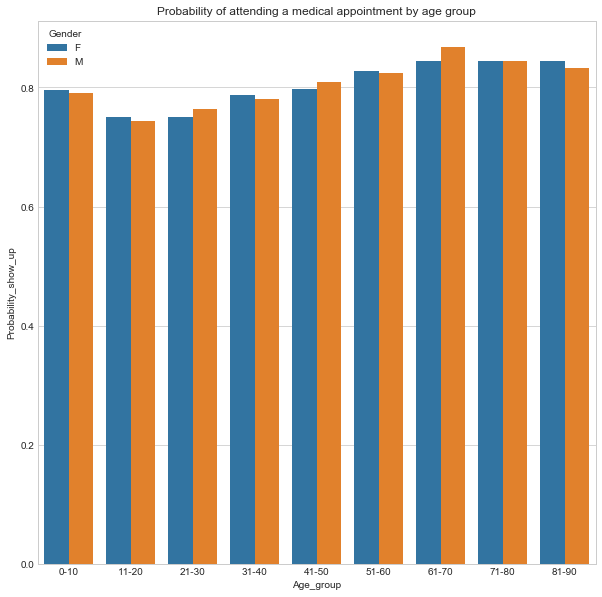

In [29]:
#Plot a bar chart with above data
sns.set_style('whitegrid')
plt.subplots(figsize = (10,10))
plt.title('Probability of attending a medical appointment by age group')
sns.barplot(x="Age_group", y="Probability_show_up", hue="Gender", data=df_age_group_prob)

From the plot above we can actually see that in the age groups, people between 11-30 are the most likely to not showing up in a medical appointment, which is intuitive because in the early stage of life, people tend to feel healthier than people in their middle age or any following ages. Young people also more likely to have many other things to do for their business or school. As their age growing, people in their middle age starts to consider more about their health, additionally, it is also the stage when different kinds of health issues coming up. Thus, it also makes sense that elder people have the highest probability of showing up in a medical appointment. In the late stage of human's lifespan, health becomes the major concern and the high probability of showing up in a health appointment can directly reflect this common sense. However, as we can see on the plot above, the octogenarian tend to have a lower probability of showing up, which is counter-intuitive. Additionally, gender factors does not reflect significant difference of showing up on time according to the plot. A deeper investigation might be helpful to understand this phenomenon. 

Text(0.5,1,'Probability of attending a medical appointment by age')

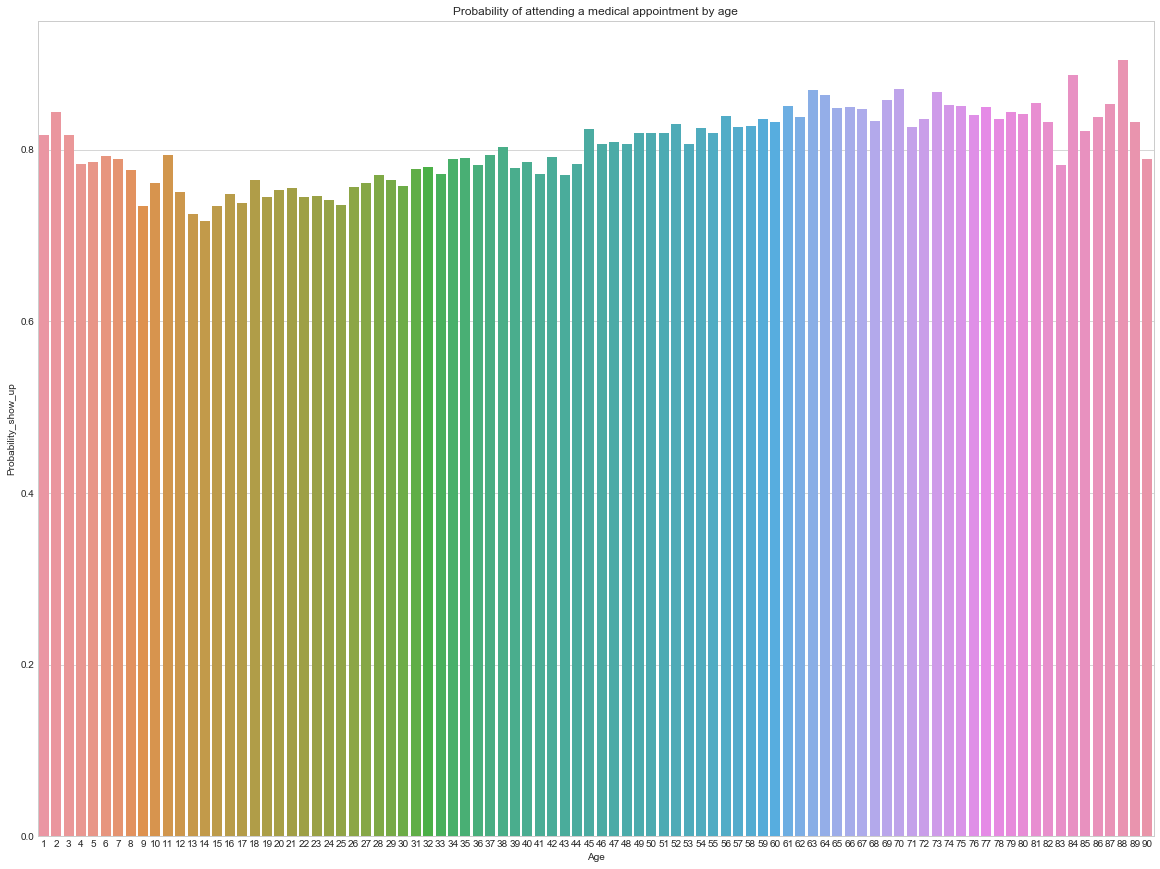

In [30]:
#Plot a more detailed age difference bar chart by using the prob_calc function
df_age_prob = prob_calc(df, 'Age')
plt.subplots(figsize=(20,15))
sns.set_style('whitegrid')
sns.barplot(x = 'Age', y = 'Probability_show_up', data = df_age_prob)
plt.title('Probability of attending a medical appointment by age')

array([[ 1.        ,  0.75049808],
       [ 0.75049808,  1.        ]])

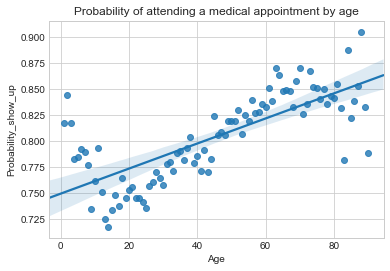

In [31]:
#Plot a scatter plot with linear regression to see the correlation between the two variables
sns.regplot(x = 'Age', y ='Probability_show_up', data = df_age_prob)
plt.title('Probability of attending a medical appointment by age')
np.corrcoef(x = df_age_prob['Age'], y = df_age_prob['Probability_show_up'])

In [32]:
#Further reduce the scope of age
df_middle = df[(df.Age >= 10) & (df.Age <= 75)]

array([[ 1.        ,  0.93062053],
       [ 0.93062053,  1.        ]])

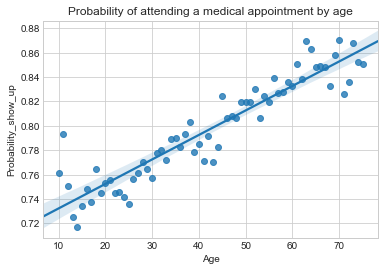

In [33]:
#Plot the scatter plot with smaller scope of age to see how the correlation changes
df_age_middle = prob_calc(df_middle, 'Age')
sns.regplot(x = 'Age', y ='Probability_show_up', data = df_age_middle)
plt.title('Probability of attending a medical appointment by age')
np.corrcoef(x = df_age_middle['Age'], y = df_age_middle['Probability_show_up'])

From the above bar plot, we can see that beyond the age of 80, the probability of showing up in a medical appointment has became more variant. Although these's no information provided regarding other demographic features of this age group, we can think of some possible reasons:
  1. The elder people over 80 have become more physically infirm than people who are less than that age. Thus the support from family members sometimes can be one of the main reason whether octogenarians can show up in an appointment or not. This explains the variant in the probability.
  2. The size of the patient who are older than 80 years old is not large enough compare to other age group. As we can see in the following descriptive statistics results, there are only 2544 people in this specific age group included in this dataset, which is significantly small compare to other age groups. The smaller size might be another one of the issue of the variant in probabilities.
  
Moreover, the correlation coefficient between age and probability of showing up is 0.75, demonstrates some level of positive correlation, indicating the age of a person has positive contribution to the probability of showing up in a medical appointment, although not strong. When we try to focus on a smaller scope of the age, for example, set the age range from 10 to 75 years old, the correlation becomes really strong, which is 0.93, demonstrates a strong correlated relationship betweeen age and probability of showing up.

In [34]:
#Check to see the population of each age group
df.groupby('Age_group').describe()['Age']['count']

Age_group
0-10     15210.0
11-20    13099.0
21-30    13783.0
31-40    15052.0
41-50    14420.0
51-60    15661.0
61-70    11189.0
71-80     5721.0
81-90     2544.0
Name: count, dtype: float64

Text(0.5,1,'Patient age distribution')

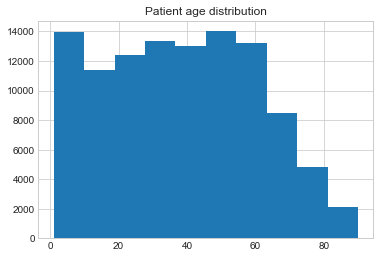

In [35]:
#Plot a histogram to visualize the distribution of each age group
plt.hist(df['Age'])
plt.title('Patient age distribution')

### How does social welfare program affect the probability of people attending medical appointments?

In [36]:
#Using prob_calc function to find the probability related to social welfare program enrollment
df_sw_prob = prob_calc(df, 'Scholarship')
df_sw_prob.Scholarship.replace(to_replace = {0:'Unenrolled', 1:'Enrolled'}, inplace = True)
df_sw_prob

No_show,Scholarship,Probability_show_up
0,Unenrolled,0.801325
1,Enrolled,0.762143


The amount of people didn't enroll in the social welfare program: 95870, the amount of those who are enrolled: 10809


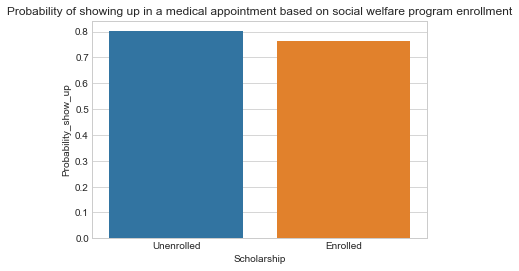

In [37]:
#Plot a bar chart to see the difference
sns.barplot(x = 'Scholarship', y = 'Probability_show_up', data = df_sw_prob)
plt.title('Probability of showing up in a medical appointment based on social welfare program enrollment')
print("The amount of people didn't enroll in the social welfare program: {}, the amount of those who are enrolled: {}".format(df.Scholarship.value_counts()[0],df.Scholarship.value_counts()[1]))

Interestingly, reading from the results, people who are enrolled in the social welfare program has a slightly lower probability of showing up in a medical appointment. The interesting result reflects a psychological pattern: People who are receiving social welfare tend to have a higher risk tolerance than those who aren't. This phenomenon is a common sense in insurance industry as well. In this case, when people receiving social welfare, they are less likely to be worried about the income loss or other serious consequences of health issue. Thus the show-up rate of medical appointment of this group of people is lower.

### How is waiting days going to impact the show up probability?

In common sense, the longer the wating time, the less likely people will show up in a appointment because of the gap of time. So how about in this case? Ploting a scatter plot with linear regression can indicate the relationship between the probability of showing up and the waiting days.

Text(0.5,1,'Correlation between waiting days and probability of showing up in a medical appointment')

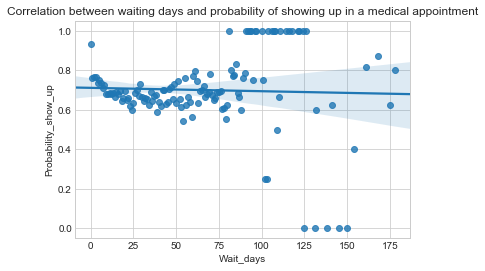

In [38]:
#Plot a scatter plot with linear regression to test the correlation between waiting days and probability of showing up
df_wd = prob_calc(df, 'Wait_days')
sns.regplot(x = 'Wait_days', y = 'Probability_show_up', data = df_wd)
np.corrcoef(x = df_wd['Wait_days'], y=df_wd['Probability_show_up'])
plt.title('Correlation between waiting days and probability of showing up in a medical appointment')

It turns out to be that waiting days is not a relevant indicator of probability in this case. The data displays a more randomly walk rather than obvious positive or negative correlation. There are some outliers in some specific time range, which probably result from only few values have been included in the dataset. Their uniqueness generates this strange scatter plot.

### How do text Message notification affect the probability of showing up?

In [39]:
#Using Prob_calc function to chekc the probability related to text message notification
df_tm = prob_calc(df, 'SMS_received', group_by = 'Gender')
df_tm.SMS_received.replace(to_replace = {0:'Not_received', 1:'Received'}, inplace = True)
df_tm

,SMS_received,Gender,Probability_show_up
0,Not_received,F,0.834881
1,Not_received,M,0.829150
2,Received,F,0.721643
3,Received,M,0.726608


Text(0.5,1,'Probability of showing up by text message reminder received')

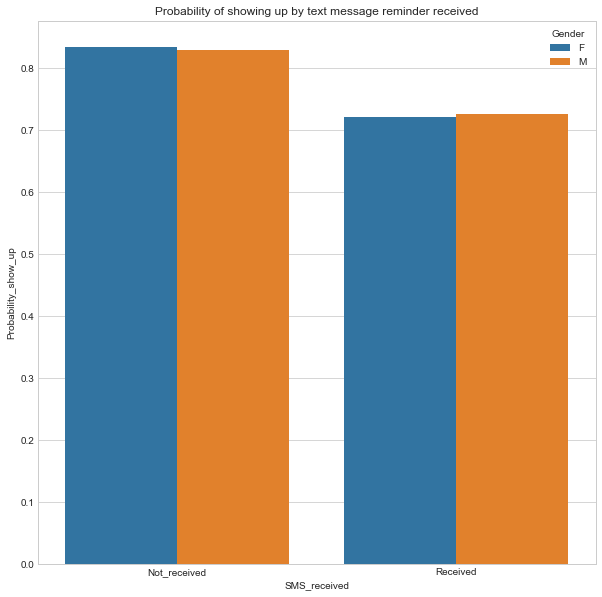

In [40]:
#Plot the above data
plt.subplots(figsize = (10,10))
sns.barplot(x = 'SMS_received', y = 'Probability_show_up', hue = 'Gender', data = df_tm)
plt.title('Probability of showing up by text message reminder received')

Surprisingly, the patient who didn't receive text messages are higher likely to show up in a medical appointment on time. Despite how did organizations implement the text message reminder, the outcome of text message notification project is not very satisfying. 

<a id='conclusions'></a>
## Conclusions


Through data assessing, data wrangling, exploratory data analysis, I got the following results:
  * The age variable is positively correlated with the probability of showing up in a medical appointment. However, the data is more variant on both sides of the age group. 
    * If include age from 0 to 90, the correlation coefficient is 0.75, which indicates a positive correlation between age and probability of showing up. 
    * If we look at patient from 10 to 75, the correlation coefficient increases significantly to 0.93, which indicates a strong correlation between these two variables. 
  * The social welfare program enrollment may have negative influence on patients' willingness to show up in a medical appointment. According to the statistical result, the patients who have enrolled in the "Bolsa Família" have 4% lower probability of showing up in a medical important than those who haven't. This might be result from psychological issue which has something to do with risk aversion.
  * Although the result is counter intuitive, the number of waiting days between the date of schdule and the data of appointment does not affect the probability of not showing up in a medical appointment. The correlation coefficient between these two variables is -0.036.
  * Another counter intuitive fact is that the text message notification program is not very effective overall. The people who received text message notification of an upcoming medical appointment generally have 10% lower probability to show up in a medical appointment on time.

In the health care industry, it is more important to make predictions than simply analyzing the results. Base on the variables provided in this dataset, the techniques of machine learning and statistical inferential can be very helpful in terms of making predictions and mitigating such phenomenon in the future. 

I have found there are some parts challenging. The neighbourhood variable might be a great indicator of the probability of not showing up in a medical appointment, but I found it was hard to analyze it because of the situation of the data is variant. There are 87 neighbourhood included in the dataset. Few of them have more than 10000 records while there are also neighbourhoods with less than 100 records in this dataset. So there's no way to properly implement data analysis as the distribution of neighbourhood is not balanced at all. I also wanted to plot the error bar in seaborn for all the bar chart. But the seaborn does not provide the functionality to plot the error bar based on the provided standard deviation in the dataframe. I have tried matplotlib plt.errorbar function to do that, but I could not get the result I wanted. Additionally, I experienced the non-linear data analysis process when I was working on this project, during exploratory data analysis process, I have found some insight in the data and I went back to modify part of the data wrangling process in order to do the analysis. This non-linear process is insightful and I think it's esstential to data analysis, as well. Overall the project is challenging and makes me think of the workflow of Python in data analysis. I will try to do more investigation of dataset in my extracurricular time to practice the skillset of using Python to implement data analysis in the future.